In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta as beta_fn

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

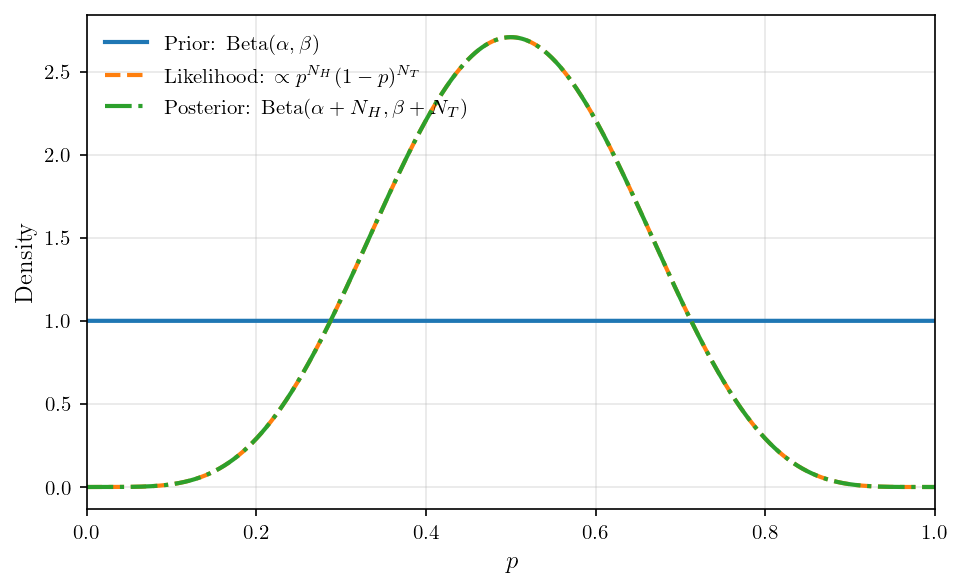

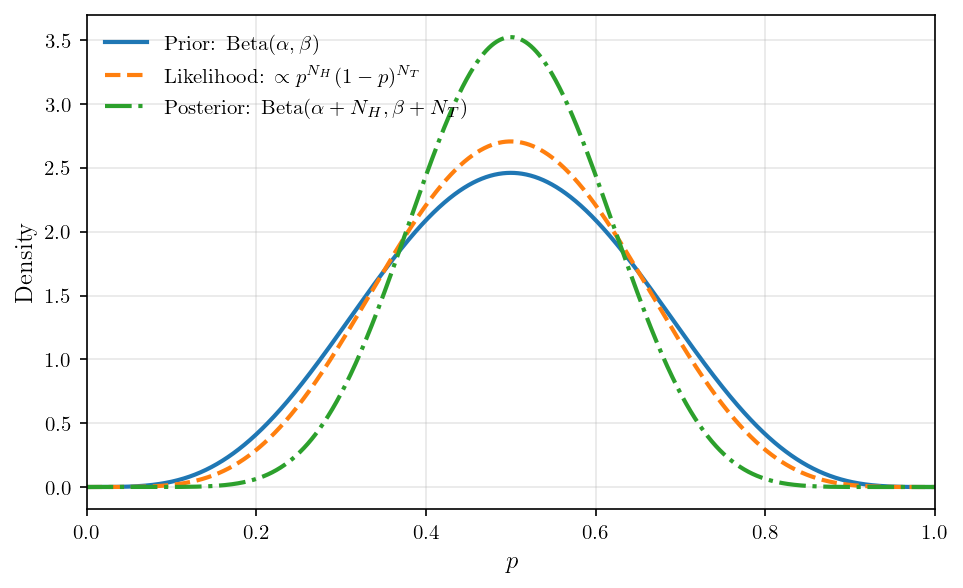

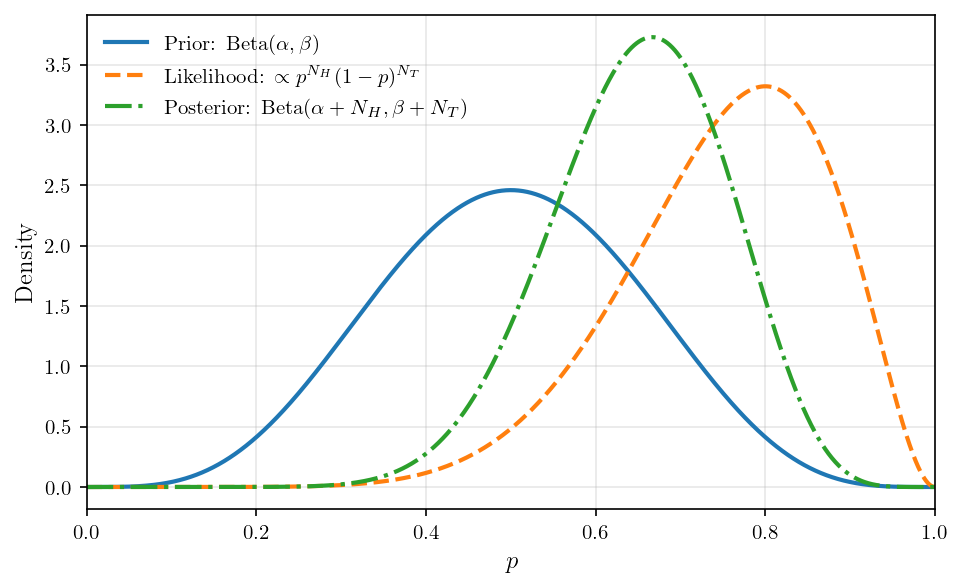

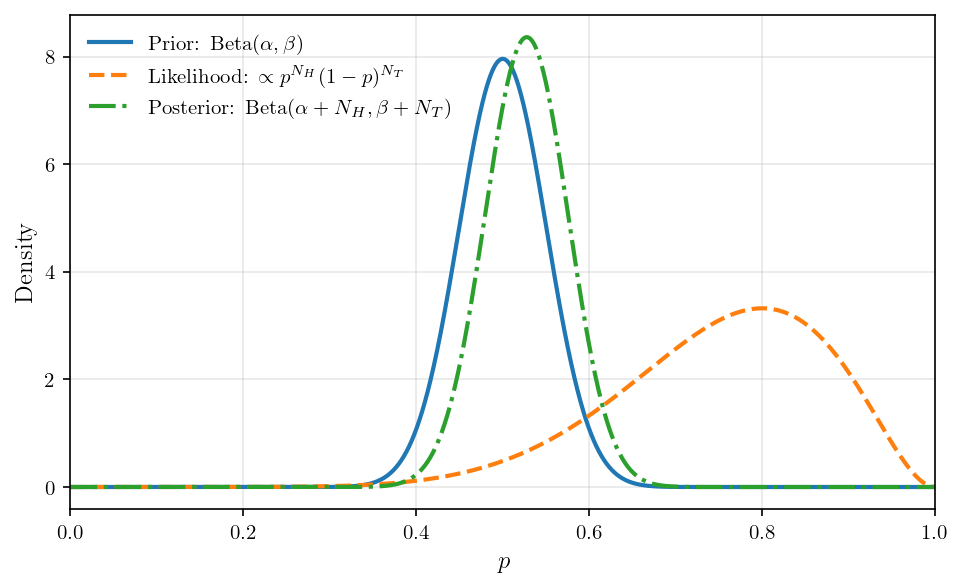

In [ ]:
def beta_pdf(p, a, b):
    """Beta(a,b) PDF on p∈(0,1)."""
    B = beta_fn(a, b)
    p = np.clip(p, 1e-12, 1 - 1e-12)
    return (p**(a-1) * (1-p)**(b-1)) / B

def plot_beta_components(alpha, beta, NH, NT, title, outfile=None, show=False):
    p = np.linspace(0, 1, 2000)

    prior = beta_pdf(p, alpha, beta)
    like  = beta_pdf(p, NH + 1, NT + 1)
    post  = beta_pdf(p, alpha + NH, beta + NT)

    fig, ax = plt.subplots(figsize=(6.5, 4.0), dpi=150)
    ax.plot(p, prior, linewidth=2, label=r"Prior: $\mathrm{Beta}(\alpha,\beta)$")
    ax.plot(p, like,  linewidth=2, linestyle="--", label=r"Likelihood: $\propto p^{N_H}(1-p)^{N_T}$")
    ax.plot(p, post,  linewidth=2, linestyle="-.", label=r"Posterior: $\mathrm{Beta}(\alpha+N_H,\beta+N_T)$")

    # ax.set_title(title, fontsize=12)
    ax.set_xlabel(r"$p$", fontsize=12)
    ax.set_ylabel(r"Density", fontsize=12)
    ax.set_xlim(0, 1)
    ax.grid(True, alpha=0.3)
    ax.legend(frameon=False, fontsize=10, ncol=1, loc="upper left")
    fig.tight_layout(pad=1.0)

    if outfile:
        fig.savefig(outfile, format="pdf", bbox_inches="tight", transparent=True)
        plt.show(fig)
    elif show:
        plt.show()
    else:
        plt.show(fig)

plot_beta_components(
    alpha=1, beta=1, NH=5, NT=5,
    title=r"Uniform prior $(\alpha=\beta=1)$ with balanced data $(N_H=5,N_T=5)$",
    outfile="../../../figs/models-vs-data/beta_binomial_uniform_balanced.pdf",
)
plot_beta_components(
    alpha=5, beta=5, NH=5, NT=5,
    title=r"Informative symmetric prior $(\alpha=\beta=5)$ with balanced data $(N_H=5,N_T=5)$",
    outfile="../../../figs/models-vs-data/beta_binomial_informative_balanced.pdf",
)
plot_beta_components(
    alpha=5, beta=5, NH=8, NT=2,
    title=r"Informative symmetric prior $(\alpha=\beta=5)$ with imbalanced data $(N_H=8,N_T=2)$",
    outfile="../../../figs/models-vs-data/beta_binomial_informative_imbalanced.pdf",
)
plot_beta_components(
    alpha=50, beta=50, NH=8, NT=2,
    title=r"Strong prior $(\alpha=\beta=50)$ with imbalanced data $(N_H=8,N_T=2)$",
    outfile="../../../figs/models-vs-data/beta_binomial_strong_prior.pdf",
)
